# Tarea_14
## Fracisco Ricardo Torres Arvizu

## __Ejercicio 1:__ 
Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [1]:
function espaaciofaserungeKutta2e(f,t0,tf,y0,delta)
   dyarreglo=[]
    yArreglo = []
    tArreglo=[]
    push!(yArreglo,y0)
    push!(tArreglo,t0)
    push!(dyarreglo,f(t0,y0))
    k1(t,y) = f(t,y)
    k2(t,y) = f(t+(delta/2),y+((delta/2)*k1(t,y)))
    k3(t,y) = f(t+(delta/2),y+((delta/2)*k2(t,y)))
    k4(t,y) = f(t+(delta),y+(delta)*k3(t,y))
    h1(t,y)=k1(t,y)+2*k2(t,y)+2*k3(t,y)+k4(t,y)
    while (tArreglo[length(tArreglo)]<tf)
        push!(tArreglo,tArreglo[length(tArreglo)]+delta)
        push!(yArreglo,yArreglo[length(yArreglo)]+(delta/6)*h1(tArreglo[length(tArreglo)-1],yArreglo[length(yArreglo)]))
        push!(dyarreglo,f(tArreglo[length(tArreglo)-1],yArreglo[length(yArreglo)-1]))
    end
   return [tArreglo, yArreglo, dyarreglo]
end

espaaciofaserungeKutta2e (generic function with 1 method)

In [2]:
xcomp(x)=x[1]
ycomp(x)=x[2]

ycomp (generic function with 1 method)

In [3]:
xcomp(x)=x[1]

xcomp (generic function with 1 method)

In [4]:
using PyPlot
plt = PyPlot
function grafica6(f,t0,tf,y0,delta)
    
 for i in 1:50
        h=0.01*(2*rand()-1)
   plt.subplot(2,1,1)
          plt.title("Espacio fase ")
    plt.tight_layout()
    plt.plot(xcomp.(espaaciofaserungeKutta2e(f,t0,tf,y0*i*h,delta)[2]),xcomp.(espaaciofaserungeKutta2e(f,t0,tf,y0*i*h,delta)[3]) )
        plt.xlabel("x(t)")
        plt.ylabel("dx/dx")
   
   
  end
  
end

grafica6 (generic function with 1 method)

In [5]:
using PyPlot
plt = PyPlot
function grafica7(f,t0,tf,y0,delta)
    h=0.1
 for i in 1:20
   plt.subplot(2,1,1)
          plt.title("Espacio fase ")
  
    plt.plot((espaaciofaserungeKutta2e(f,t0,tf,y0*i*h,delta)[1]),xcomp.(espaaciofaserungeKutta2e(f,t0,tf,y0*i*h,delta)[2]) )
        plt.xlabel("t")
        plt.ylabel("x(t)")
    plt.subplot(2,1,2)
    plt.plot((espaaciofaserungeKutta2e(f,t0,tf,y0*i*h,delta)[1]),xcomp.(espaaciofaserungeKutta2e(f,t0,tf,y0*i*h,delta)[3]))
        plt.xlabel("t")
        plt.ylabel("dx(t)/dt")
        plt.title("Espacio fase ")
  end 
end

grafica7 (generic function with 1 method)

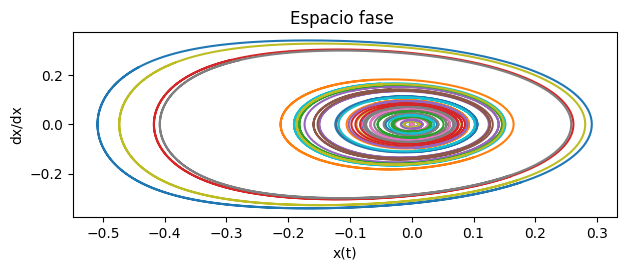

In [6]:
grafica6((t,x)->[x[2]-(x[2])^3,-x[1]-(x[2])^2]
,-5,5,[-0.5,0.7],0.0001)

## Jacobiano del sistema 
El sistema se define como  $$\vec F=\left(\begin{array}{cc} y-y^3 \\-x-y^2 \end{array} \right)$$ 
Se calcula la matriz jacobiana, que se define como $$J(\vec{x})= \begin{pmatrix}
\frac{\partial f_{1}}{\partial x_1} & \cdots & \frac{\partial f_{1}}{\partial x_n} \\
\vdots   & \ddots & \vdots  \\
\frac{\partial f_{n}}{\partial x_n} & \cdots & \frac{\partial F_{n}}{\partial x_n} 
\end{pmatrix} $$ 
sustituyendo $\vec F$
 $$J(x,y)=\left(\begin{array}{cc} 0 & 1-3y^2 \\-1 & -2y \end{array} \right)$$ 
 Si  $(x,y)=(0,0)$ la matriz se vuelve: $$J(0,0)=\left(\begin{array}{cc} 0 & 1 \\-1 &  0 \end{array} \right)$$ 
     podemos obtener $\Delta$ y $\tau$ apartir de su definición $$\Delta= \det (J(0,0))=1$$ $$\tau=\text{tr} (J(0,0))=0$$ Conforme al diagrama se ve que  $\Delta$ es positivo y $\tau$ es cero, entonces el $\vec 0$ representa un centro.

## __Ejercicio 2:__
Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol: $${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
Usen $\mu=0.5$.
Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

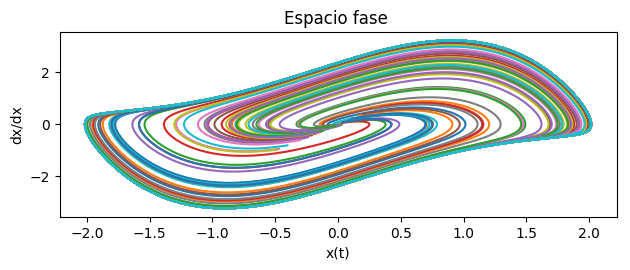

In [7]:
grafica6((t,y)->[y[2],1.5*(1-y[1]^2)y[2]-y[1]]
,-10,10,[1,2],0.001)

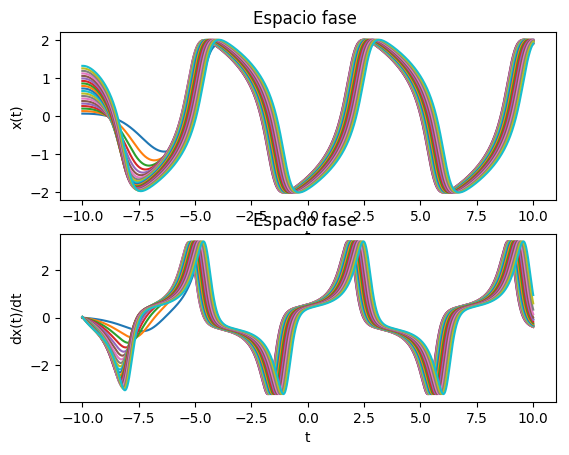

In [8]:
grafica7((t,y)->[y[2],1.5*(1-y[1]^2)y[2]-y[1]]
,-10,10,[rand(),rand()],0.001)

__Ejercicio Clase:__

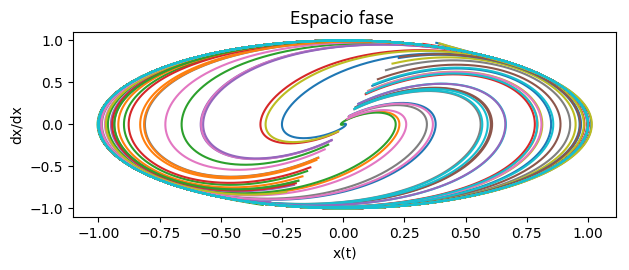

In [9]:
grafica6((t,x)->[x[1]+x[2]-x[1]*(x[1]^2+x[2]^2),-(x[1]-x[2])-x[2]*(x[1]^2+x[2]^2)]
,-10,10,[1,3],0.001)

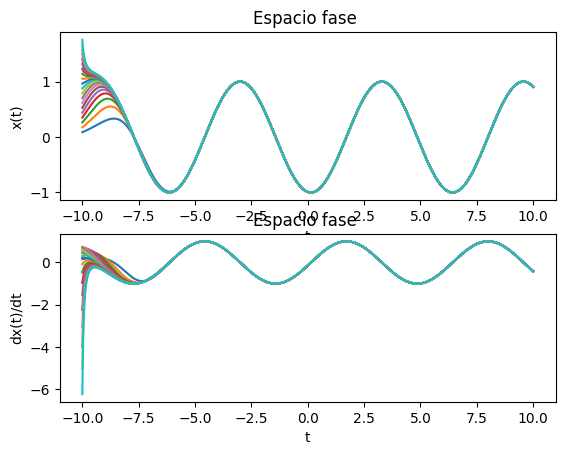

In [10]:
grafica7((t,x)->[x[1]+x[2]-x[1]*(x[1]^2+x[2]^2),-(x[1]-x[2])-x[2]*(x[1]^2+x[2]^2)]
,-10,10,[rand(),rand()],0.001)